The entire world is transforming digitally and our relationship with technology has grown exponentially over the last few years. We have grown closer to technology, and it has made our life a lot easier by saving time and effort. Today everything is accessible with smartphones — from groceries to cooked food and from medicines to doctors. In this hackathon, we provide you with data that is a by-product as well as a thriving proof of this growing relationship. 

When was the last time you ordered food online? And how long did it take to reach you?

In this hackathon, we are providing you with data from thousands of restaurants in India regarding the time they take to deliver food for online order. As data scientists, your goal is to predict the online order delivery time based on the given factors.

Analytics India Magazine and IMS Proschool bring to you ‘Predicting Predicting Food Delivery Time Hackathon’.

Size of training set: 11,094 records

Size of test set: 2,774 records

FEATURES:

* Restaurant: A unique ID that represents a restaurant.
* Location: The location of the restaurant.
* Cuisines: The cuisines offered by the restaurant.
* Average_Cost: The average cost for one person/order.
* Minimum_Order: The minimum order amount.
* Rating: Customer rating for the restaurant.
* Votes: The total number of customer votes for the restaurant.
* Reviews: The number of customer reviews for the restaurant.
* Delivery_Time: The order delivery time of the restaurant. (Target Classes) 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_excel('Data_Test.xlsx')
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [3]:
train = pd.read_excel('Data_Train.xlsx')
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


# Univariate Analysis

In [4]:
## combine the dataset
combined = pd.concat([train, test], sort = False, ignore_index = True)

In [5]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [6]:
combined.Delivery_Time.value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

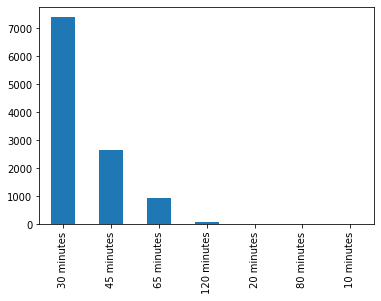

In [7]:
combined.Delivery_Time.value_counts().plot(kind = 'bar')

In [8]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [9]:
combined.Reviews.unique()
## Review the dash in reviews


array(['4', '30', '95', '235', '18', '31', '1235', '26', '294', '61',
       '1239', '-', '128', '5', '53', '47', '46', '23', '160', '2', '1',
       '38', '9', '19', '7', '132', '74', '13', '111', '499', '29', '34',
       '851', '513', '22', '27', '32', '25', '37', '8', '35', '6', '173',
       '36', '15', '174', '11', '59', '16', '89', '170', '10', '1660',
       '71', '41', '20', '40', '3', '191', '105', '100', '106', '21',
       '65', '69', '2547', '159', '110', '42', '181', '109', '179', '490',
       '28', '343', '118', '690', '72', '296', '33', '164', '50', '129',
       '1581', '234', '45', '2363', '24', '115', '12', '138', '175', '39',
       '66', '1603', '1443', '390', '108', '1457', '112', '107', '259',
       '269', '52', '196', '794', '589', '48', '145', '536', '247', '17',
       '49', '245', '87', '83', '54', '453', '318', '99', '205', '165',
       '1845', '766', '114', '44', '51', '104', '478', '70', '232', '435',
       '14', '659', '554', '399', '77', '88', '503',

In [10]:
combined.Votes.value_counts()
## see - in votes

-       2616
4        298
6        255
7        242
9        238
5        227
8        216
12       191
11       173
10       173
13       144
15       143
16       133
18       127
14       123
22       120
20       115
19       111
17       103
26        98
27        96
21        90
37        89
23        86
28        85
24        83
25        83
29        81
31        80
36        77
        ... 
837        1
756        1
915        1
1188       1
1493       1
637        1
1850       1
1740       1
1894       1
2805       1
1250       1
854        1
2996       1
5197       1
2191       1
2035       1
1195       1
1334       1
831        1
690        1
1612       1
1134       1
559        1
2602       1
1098       1
1428       1
561        1
1326       1
3460       1
893        1
Name: Votes, Length: 1181, dtype: int64

In [11]:
combined.Rating.unique()
## Dash, string based info such as new, opening soon and temp closed

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [12]:
combined.Average_Cost.unique()
## Symbol , for and Comma

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [13]:
combined.Minimum_Order.unique()
## Symbol

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59', '₹149', '₹399'], dtype=object)

In [14]:
int(combined.Minimum_Order[0].split('₹')[1])

50

In [15]:
mylist = []
for i in combined.Minimum_Order:
    mylist.append(int(i.split('₹')[1]))

In [16]:
mylist

[50,
 50,
 50,
 99,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 99,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 99,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 

In [17]:
combined['MinOrder_Cleansed'] = pd.Series(mylist)
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99


In [18]:
a = '₹2,050'.split('₹')[1]
a

'2,050'

In [19]:
a.replace(',',"")

'2050'

In [20]:
combined.loc[combined.Average_Cost == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes,50


In [21]:
combined.loc[combined.Average_Cost == 'for', 'Average_Cost'] = '0'

In [22]:
combined.loc[combined.Average_Cost == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed


In [23]:
cost = []
for i in combined.Average_Cost:
    cost.append(int(i.replace('₹', '').replace(',', '')))

In [24]:
cost

[200,
 100,
 150,
 250,
 200,
 150,
 150,
 650,
 100,
 200,
 350,
 800,
 150,
 50,
 100,
 100,
 100,
 200,
 150,
 100,
 200,
 150,
 250,
 200,
 150,
 100,
 100,
 150,
 150,
 200,
 150,
 400,
 200,
 350,
 100,
 600,
 100,
 100,
 200,
 300,
 200,
 150,
 150,
 100,
 200,
 200,
 200,
 200,
 200,
 200,
 150,
 150,
 100,
 200,
 250,
 100,
 150,
 250,
 100,
 100,
 350,
 100,
 600,
 200,
 200,
 150,
 100,
 200,
 150,
 300,
 300,
 150,
 200,
 100,
 350,
 100,
 100,
 100,
 100,
 100,
 750,
 100,
 150,
 200,
 150,
 200,
 150,
 200,
 100,
 50,
 150,
 150,
 100,
 200,
 200,
 100,
 200,
 100,
 100,
 150,
 300,
 200,
 200,
 100,
 200,
 100,
 200,
 200,
 150,
 100,
 200,
 200,
 150,
 100,
 150,
 150,
 300,
 250,
 150,
 150,
 100,
 200,
 300,
 450,
 350,
 100,
 150,
 50,
 200,
 300,
 250,
 150,
 100,
 150,
 50,
 200,
 150,
 150,
 100,
 200,
 100,
 300,
 150,
 100,
 250,
 50,
 150,
 150,
 150,
 150,
 200,
 150,
 200,
 100,
 250,
 150,
 150,
 150,
 200,
 200,
 250,
 100,
 200,
 100,
 250,
 200,
 100,
 60

In [25]:
combined['AvgCost_Cleaned'] = pd.Series(cost)
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50,200
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50,100
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50,150
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99,250
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99,200


In [26]:
combined.AvgCost_Cleaned.unique()

array([ 200,  100,  150,  250,  650,  350,  800,   50,  400,  600,  300,
        750,  450,  550, 1000,  500,  900, 1200,  950,  850,  700, 1150,
          0, 1100, 1400, 2050], dtype=int64)

In [27]:
combined.Location.unique()

array(['FTI College, Law College Road, Pune', 'Sector 3, Marathalli',
       'Mumbai Central', 'Sector 1, Noida',
       'Rmz Centennial, I Gate, Whitefield', 'Delhi University-GTB Nagar',
       'Yerawada, Pune, Maharashtra',
       'Delhi Administration Flats, Timarpur', 'Moulali, Kolkata',
       'Dockyard Road, Mumbai CST Area', 'Pune University',
       'Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'D-Block, Sector 63, Noida', 'Sector 14, Noida',
       'Mico Layout, Stage 2, BTM Layout,Bangalore',
       'Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'Tiretti, Kolkata', 'Sandhurst Road, Mumbai CST Area',
       'MG Road, Pune', 'Hyderabad Public School, Begumpet', 'Majestic',
       'Chandni Chowk, Kolkata', 'Delhi High Court, India Gate',
       'Chatta Bazaar, Malakpet, Hyderabad', 'Sector 63A,Gurgaon',
       'Delhi Cantt.', 'Tejas Nagar Colony, Wadala West, Mumbai',
       'Babarpur, New Delhi, Delhi', 'Nathan Road, Mangaldas Road, Pune',
       'Panjetan C

In [28]:
combined.Location[0].split(', ')[-1]

'Pune'

In [29]:
locs = []
for i in combined.Location:
    locs.append(i.split(', ')[-1])

In [30]:
combined['Location_cleansed'] = pd.Series(locs)

In [31]:
combined.Location_cleansed.unique()

array(['Pune', 'Marathalli', 'Mumbai Central', 'Noida', 'Whitefield',
       'Delhi University-GTB Nagar', 'Maharashtra', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Pune University', 'BTM Layout,Bangalore',
       'Gurgoan', 'Begumpet', 'Majestic', 'India Gate', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Delhi Cantt.', 'Mumbai', 'Delhi',
       'Electronic City'], dtype=object)

In [32]:
combined[combined.Location_cleansed == 'Electronic City']['Location'].unique()

array(['BTM Layout 1, Electronic City'], dtype=object)

In [33]:
## Bangalore
combined.Location_cleansed.replace(to_replace = ['Marathalli', 'Whitefield', 'Majestic', 'BTM Layout,Bangalore',
                                                 'Electronic City'], value = ['Bangalore']*5, inplace = True)

In [34]:
## Pune
combined.Location_cleansed.replace(to_replace = ['Maharashtra', 'Pune University'], value = ['Pune']*2, inplace = True)

In [35]:
## Delhi
combined.Location_cleansed.replace(to_replace = ['Delhi University-GTB Nagar', 'Timarpur',
                                                'Delhi Cantt.', 'India Gate'], value = ['Delhi']*4, inplace = True)

In [36]:
## Gurgaon spell check
combined.loc[combined.Location_cleansed == 'Gurgoan', 'Location_cleansed'] = 'Gurgaon'

In [37]:
## Gurgaon
combined.Location_cleansed.replace('Sector 63A,Gurgaon', 'Gurgaon', inplace = True)

In [38]:
## Mumbai
combined.Location_cleansed.replace(to_replace = ['Mumbai Central', 'Mumbai CST Area'], value = ['Mumbai']*2, inplace = True)

In [39]:
## Hyderabad
combined.Location_cleansed.replace(to_replace = ['Begumpet', 'Hyderabad'], value = ['Hyderabad']*2, inplace = True)

In [40]:
combined.Location_cleansed.unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgaon', 'Hyderabad'], dtype=object)

In [41]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50,200,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50,100,Bangalore
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50,150,Mumbai
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99,250,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99,200,Bangalore


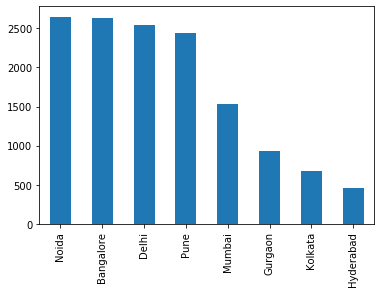

In [42]:
combined.Location_cleansed.value_counts().plot(kind = 'bar')

In [43]:
combined.Cuisines.unique()

array(['Fast Food, Rolls, Burger, Salad, Wraps', 'Ice Cream, Desserts',
       'Italian, Street Food, Fast Food', ...,
       'North Indian, Chinese, Japanese',
       'Asian, Italian, Continental, Desserts, Healthy Food',
       'North Indian, Rolls, Chinese, Continental, Fast Food'],
      dtype=object)

In [44]:
combined.Cuisines[0].split(", ")

['Fast Food', 'Rolls', 'Burger', 'Salad', 'Wraps']

In [45]:
food = []
for i in combined.Cuisines:
    food.append(i.split(", "))

In [46]:
df = pd.DataFrame(food)

In [47]:
df.head()

,0,1,2,3,4,5,6,7
0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,Ice Cream,Desserts,None,None,None,None,None,None
2,Italian,Street Food,Fast Food,None,None,None,None,None
3,Mughlai,North Indian,Chinese,None,None,None,None,None
4,Cafe,Beverages,None,None,None,None,None,None


In [48]:
df[0].unique()

array(['Fast Food', 'Ice Cream', 'Italian', 'Mughlai', 'Cafe',
       'South Indian', 'Beverages', 'Chinese', 'Mithai', 'North Indian',
       'Burger', 'Biryani', 'Kerala', 'Desserts', 'Bakery', 'Asian',
       'Street Food', 'Pizza', 'Lucknowi', 'Tea', 'Rolls', 'Bengali',
       'Mishti', 'European', 'Momos', 'Continental', 'Andhra', 'German',
       'Finger Food', 'Sandwich', 'Chettinad', 'Juices', 'Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian', 'Bar Food', 'Konkan', 'Odia', 'Paan',
       'Wraps', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Frozen Yogurt', 'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 'Hot dogs',
       'Iranian', 'Brazilian', 'Indian', 'Af

In [49]:
fastfood = ['Fast Food','Cafe','Burger','Street Food', 'Pizza', 'Rolls','Momos','Finger Food', 'Sandwich',
            'Bar Food', 'Wraps','Hot dogs']

bevrages = ['Coffee','Bubble Tea','Juices','Tea','Beverages']

deserts = ['Ice Cream','Desserts','Mithai','Bakery', 'Mishti' ,'Paan','Frozen Yogurt']

maincourse = ['Italian', 'Mughlai', 'South Indian', 'Chinese',  'North Indian','Biryani', 'Kerala','Asian', 'Bengali'
             , 'European',  'Continental', 'Andhra', 'German', 'Chettinad', 'Parsi','Japanese','Salad', 'Tamil',
             'North Eastern', 'Maharashtrian','Tibetan', 'Arabian','Konkan', 'Odia','Lebanese',
             'American', 'Mediterranean', 'Bohri','Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
              'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan','Korean', 'Kebab', 'Kashmiri',
             'Bihari', 'Portuguese','Afghan', 'Awadhi', 'Malwani', 'Malaysian','Hyderabadi', 'French',
             'Modern Indian', 'Sushi', 'Hot dogs','Iranian', 'Brazilian', 'Indian', 'African', 'Turkish',
             'Assamese', 'Naga', 'Middle Eastern', 'Vietnamese',
             'Steak','Cantonese','Belgian','Charcoal Chicken','Tex-Mex']


In [50]:
#Function to convert the food into cat

def makefoodcat(x):
   if (x in fastfood):
       return('Fast Food')
   elif(x in bevrages):
       return('Bevrages')
   elif(x in deserts):
       return('Deserts')
   else:
       return('Main Course')


In [51]:
combined['Cuisines_Cleansed'] = pd.Series(df[0].apply(makefoodcat))


In [52]:
#Imputing the values
combined.loc[combined.Average_Cost=='0','AvgCost_Cleaned'] = 150

In [53]:
combined[(combined.Location_cleansed == 'Pune') & (combined.Cuisines_Cleansed == 'Fast Food')]['AvgCost_Cleaned'].describe()


count    802.000000
mean     186.284289
std      116.942569
min       50.000000
25%      100.000000
50%      150.000000
75%      200.000000
max      800.000000
Name: AvgCost_Cleaned, dtype: float64

In [54]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50,200,Pune,Fast Food
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50,100,Bangalore,Deserts
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50,150,Mumbai,Main Course
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99,250,Noida,Main Course
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99,200,Bangalore,Fast Food


In [55]:
## Ratings
combined.Rating.unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [56]:
combined[combined.Rating == 'NEW'].shape

(958, 13)

In [57]:
combined.loc[combined.Restaurant == 'ID_6472']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed
5988,ID_6472,"D-Block, Sector 63, Noida",Fast Food,₹200,₹99,3.7,1056,329,65 minutes,99,200,Noida,Fast Food
6297,ID_6472,Pune University,Fast Food,0,₹50,NEW,-,-,30 minutes,50,150,Pune,Fast Food


In [58]:
combined.Rating = pd.to_numeric(combined.Rating, errors= 'coerce')

In [59]:
combined.Rating.describe()

count    11398.000000
mean         3.610791
std          0.413490
min          2.100000
25%          3.300000
50%          3.600000
75%          3.900000
max          4.900000
Name: Rating, dtype: float64

In [60]:
combined.Rating.fillna(value = 3.6, inplace = True)

In [61]:
## Reviews
combined.Reviews.unique()

array(['4', '30', '95', '235', '18', '31', '1235', '26', '294', '61',
       '1239', '-', '128', '5', '53', '47', '46', '23', '160', '2', '1',
       '38', '9', '19', '7', '132', '74', '13', '111', '499', '29', '34',
       '851', '513', '22', '27', '32', '25', '37', '8', '35', '6', '173',
       '36', '15', '174', '11', '59', '16', '89', '170', '10', '1660',
       '71', '41', '20', '40', '3', '191', '105', '100', '106', '21',
       '65', '69', '2547', '159', '110', '42', '181', '109', '179', '490',
       '28', '343', '118', '690', '72', '296', '33', '164', '50', '129',
       '1581', '234', '45', '2363', '24', '115', '12', '138', '175', '39',
       '66', '1603', '1443', '390', '108', '1457', '112', '107', '259',
       '269', '52', '196', '794', '589', '48', '145', '536', '247', '17',
       '49', '245', '87', '83', '54', '453', '318', '99', '205', '165',
       '1845', '766', '114', '44', '51', '104', '478', '70', '232', '435',
       '14', '659', '554', '399', '77', '88', '503',

In [62]:
combined.Reviews = pd.to_numeric(combined.Reviews, errors= 'coerce')

In [63]:
combined.Reviews.describe()

count    10963.000000
mean       120.893004
std        315.592114
min          1.000000
25%          7.000000
50%         26.000000
75%         90.000000
max       6504.000000
Name: Reviews, dtype: float64

In [64]:
combined.Reviews.fillna(value = 26, inplace = True)

In [65]:
## Votes
combined.Votes = pd.to_numeric(combined.Votes, errors= 'coerce')

In [66]:
combined.Votes.describe()

count    11252.000000
mean       241.050036
std        549.570301
min          3.000000
25%         19.000000
50%         63.000000
75%        214.000000
max       9054.000000
Name: Votes, dtype: float64

In [67]:
combined.Votes.fillna(value = 63, inplace = True)

In [68]:
## Rating Category Func
def rating_cat(x):
    if x>=4.5:
        return ('Excellent')
    elif(x>=4.0):
        return ('Very Good')
    elif(x>=3.5):
        return('Good')
    elif(x>=3.0):
        return('Average')
    else:
        return('Poor')

In [69]:
combined['Rating_Category'] = combined.Rating.apply(rating_cat)

In [70]:
combined.Rating_Category.unique()

array(['Good', 'Average', 'Very Good', 'Poor', 'Excellent'], dtype=object)

In [71]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed,Rating_Category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


In [72]:
newtrain = combined.loc[:train.shape[0]-1]

In [73]:
newtrain.shape

(11094, 14)

In [74]:
newtest = combined.loc[11094:combined.shape[0]]
newtest.shape

(2774, 14)

In [75]:
train_new = newtrain.drop(['Restaurant','Location','Cuisines', 'Average_Cost', 'Minimum_Order'], axis = 1)

In [76]:
test_new = newtest.drop(['Restaurant','Location','Cuisines', 'Average_Cost', 'Minimum_Order','Delivery_Time'], axis = 1)

In [77]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed,Rating_Category
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average


In [78]:
test_new.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed,Rating_Category
11094,4.2,361.0,225.0,50,350,Bangalore,Main Course,Very Good
11095,3.6,63.0,26.0,50,100,Bangalore,Main Course,Good
11096,3.6,36.0,16.0,50,100,Noida,Fast Food,Good
11097,3.6,66.0,33.0,50,200,Delhi,Deserts,Good
11098,2.9,38.0,14.0,50,150,Noida,Main Course,Poor


# Problem Statement - I want to find out if rating has an impact on the delivery time

Ho : There is no impact on delivery time vs rating
Ha : There is impact on delivery time vs rating. 

## Choose level of significance
LOS = 0.95 and Alpha = 0.05

## Test of Significance - Anova i.e F-test
since our column is numerical and anotehr column is Categorical in nature
## Inference rule:
if p value < 0.05, we reject Ho and accept Ha

In [79]:
import scipy.stats as stats
import statsmodels.api as sms ## Anova Table Library
from statsmodels.formula.api import ols ## regression fit library

In [80]:
model = ols('Rating~Delivery_Time', data = train_new).fit()

In [81]:
## Anova
sms.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Delivery_Time,6.0,51.471247,8.578541,62.727838,7.136598e-77
Residual,11087.0,1516.237260,0.136758,NaN,NaN


## Summary of the tests

1. If columns are numerical in nature and no population metric is given then t test is an ideal test
2. If 1 column is numerical and another is categorical then variance can be explained by Applying anova
3. If both columns are categorical in nature, then we apply chi square test of goodness of fit
where chi square test is right tailed test in nature

correlation first and then regression



In [83]:
df= pd.crosstab(train_new['Rating'],train_new['Delivery_Time'])

In [85]:

stats.chi2_contingency(df)

(1468.9032957219797,
 2.3043062828739024e-206,
 168,
 array([[3.60555255e-04, 5.58860645e-03, 1.80277628e-03, 6.67568055e-01,
         2.40219939e-01, 8.31981251e-02, 1.26194339e-03],
        [3.60555255e-04, 5.58860645e-03, 1.80277628e-03, 6.67568055e-01,
         2.40219939e-01, 8.31981251e-02, 1.26194339e-03],
        [2.16333153e-03, 3.35316387e-02, 1.08166577e-02, 4.00540833e+00,
         1.44131963e+00, 4.99188751e-01, 7.57166036e-03],
        [4.68721832e-03, 7.26518839e-02, 2.34360916e-02, 8.67838471e+00,
         3.12285920e+00, 1.08157563e+00, 1.64052641e-02],
        [9.73499189e-03, 1.50892374e-01, 4.86749594e-02, 1.80243375e+01,
         6.48593835e+00, 2.24634938e+00, 3.40724716e-02],
        [1.51433207e-02, 2.34721471e-01, 7.57166036e-02, 2.80378583e+01,
         1.00892374e+01, 3.49432125e+00, 5.30016225e-02],
        [2.74021994e-02, 4.24734090e-01, 1.37010997e-01, 5.07351722e+01,
         1.82567153e+01, 6.32305751e+00, 9.59076979e-02],
        [5.66071750e-02, 8.774

### Introduction to Ensembles

 1. Normally in any machine learning problem we have train and test set now validation set

In [87]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [88]:
le=LabelEncoder() #created a machine called le that has label endcoder 

In [89]:
train_new["Delivery_TimeCoded"]= le.fit_transform(train_new.Delivery_Time)

In [90]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed,Rating_Category,Delivery_TimeCoded
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,3
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good,3
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good,5
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good,3
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average,5


In [91]:
finaltrain=train_new.drop("Delivery_Time", axis=1)

In [92]:
finaltrain.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed,Rating_Category,Delivery_TimeCoded
0,3.5,12.0,4.0,50,200,Pune,Fast Food,Good,3
1,3.5,11.0,4.0,50,100,Bangalore,Deserts,Good,3
2,3.6,99.0,30.0,50,150,Mumbai,Main Course,Good,5
3,3.7,176.0,95.0,99,250,Noida,Main Course,Good,3
4,3.2,521.0,235.0,99,200,Bangalore,Fast Food,Average,5


In [93]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Rating                11094 non-null float64
Votes                 11094 non-null float64
Reviews               11094 non-null float64
MinOrder_Cleansed     11094 non-null int64
AvgCost_Cleaned       11094 non-null int64
Location_cleansed     11094 non-null object
Cuisines_Cleansed     11094 non-null object
Rating_Category       11094 non-null object
Delivery_TimeCoded    11094 non-null int32
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 736.8+ KB


In [94]:
finaltrain.shape

(11094, 9)

In [95]:
dummytrain=pd.get_dummies(finaltrain)

In [96]:
dummytrain.shape

(11094, 23)

In [97]:
dummytrain.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,AvgCost_Cleaned,Delivery_TimeCoded,Location_cleansed_Bangalore,Location_cleansed_Delhi,Location_cleansed_Gurgaon,Location_cleansed_Hyderabad,...,Location_cleansed_Pune,Cuisines_Cleansed_Bevrages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,3.5,12.0,4.0,50,200,3,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,3.5,11.0,4.0,50,100,3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.6,99.0,30.0,50,150,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,5,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### split the Data in Train and Test(Validation Set)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x=dummytrain.drop("Delivery_TimeCoded",axis=1)
y=dummytrain.Delivery_TimeCoded


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=123)

In [100]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()

In [101]:
scaled_train=pd.DataFrame(sc.fit_transform(xtrain), columns=xtrain.columns)

In [102]:
xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [103]:
scaled_train.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed_Bangalore,Location_cleansed_Delhi,Location_cleansed_Gurgaon,Location_cleansed_Hyderabad,Location_cleansed_Kolkata,...,Location_cleansed_Pune,Cuisines_Cleansed_Bevrages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,-0.036508,0.014104,-0.004227,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,2.175593,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
1,-0.300793,-0.210916,-0.210371,2.533425,0.734977,-0.484987,-0.471826,3.720368,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
2,-1.622216,-0.298878,-0.270793,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,4.378408,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,1.814273,-0.129328,-1.089513,-0.22399,-0.436436
3,1.813484,0.083656,0.066857,-0.178950,-0.027581,-0.484987,2.119423,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,-1.089513,-0.22399,2.291288
4,0.756345,0.230942,0.226797,-0.178950,-0.027581,2.061912,-0.471826,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436


In [104]:
scaled_train.Rating.describe()

count    8.875000e+03
mean     5.504204e-17
std      1.000056e+00
min     -4.000777e+00
25%     -5.650777e-01
50%     -3.650850e-02
75%      4.920607e-01
max      3.399191e+00
Name: Rating, dtype: float64

In [106]:
#mean=0
#std=1

#check std and mean
scaled_train.AvgCost_Cleaned.describe()

count    8.875000e+03
mean     3.227465e-18
std      1.000056e+00
min     -1.171418e+00
25%     -7.901390e-01
50%     -2.758097e-02
75%     -2.758097e-02
max      1.407974e+01
Name: AvgCost_Cleaned, dtype: float64

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
pred_knn=knn.fit(scaled_train,ytrain).predict(xtest)

In [108]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef

In [109]:
print("The Accuracy Score is",accuracy_score(ytest,pred_knn))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_knn))
print("The mathews Score is",matthews_corrcoef(ytest,pred_knn))

The Accuracy Score is 0.701216764308247
The Kappa Score is 0.28840261248480614
The mathews Score is 0.3004472727292913


In [110]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy")

In [111]:
pred_rf=rf.fit(scaled_train, ytrain).predict(xtest)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [112]:
print("The Accuracy Score is",accuracy_score(ytest,pred_rf))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_rf))
print("The mathews Score is",matthews_corrcoef(ytest,pred_rf))

The Accuracy Score is 0.7895448400180262
The Kappa Score is 0.5316140504078313
The mathews Score is 0.5362389441587431


In [113]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

pred_dt = dtree.fit(scaled_train,ytrain).predict(xtest)

In [114]:

print("The Accuracy Score is",accuracy_score(ytest,pred_dt))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_dt))
print("The mathews Score is",matthews_corrcoef(ytest,pred_dt))

The Accuracy Score is 0.7543938711131141
The Kappa Score is 0.4877875954769122
The mathews Score is 0.48780029601783076


# Voting Classifier

In [115]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('KNN', knn),('Tree', dtree),("Random Forest",rf) ])#voting='soft'
       

pred_vc=vc.fit(scaled_train,ytrain).predict(xtest)

In [116]:

print("The Accuracy Score is",accuracy_score(ytest,pred_vc))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_vc))
print("The mathews Score is",matthews_corrcoef(ytest,pred_vc))

The Accuracy Score is 0.7945020279405137
The Kappa Score is 0.5309011709575816
The mathews Score is 0.5405330944928113


# Boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()

pred_gbm=gbm.fit(scaled_train,ytrain).predict(xtest)

In [118]:

print("The Accuracy Score is",accuracy_score(ytest,pred_gbm))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_gbm))
print("The mathews Score is",matthews_corrcoef(ytest,pred_gbm))

The Accuracy Score is 0.7341144659756648
The Kappa Score is 0.38135936405060034
The mathews Score is 0.39129169759271193


In [119]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=gbm, X=scaled_train,y=ytrain,cv=5)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.73115861, 0.74155405, 0.73817568, 0.73096447, 0.71896163])

In [120]:

cross_val_score(estimator=gbm, X=scaled_train,y=ytrain,cv=5).mean()

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.7315995042981382

In [121]:

scaled_train.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed_Bangalore,Location_cleansed_Delhi,Location_cleansed_Gurgaon,Location_cleansed_Hyderabad,Location_cleansed_Kolkata,...,Location_cleansed_Pune,Cuisines_Cleansed_Bevrages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,-0.036508,0.014104,-0.004227,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,-0.228394,...,2.175593,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
1,-0.300793,-0.210916,-0.210371,2.533425,0.734977,-0.484987,-0.471826,3.720368,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436
2,-1.622216,-0.298878,-0.270793,-0.178950,-0.027581,-0.484987,-0.471826,-0.268791,-0.189291,4.378408,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,1.814273,-0.129328,-1.089513,-0.22399,-0.436436
3,1.813484,0.083656,0.066857,-0.178950,-0.027581,-0.484987,2.119423,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,-1.089513,-0.22399,2.291288
4,0.756345,0.230942,0.226797,-0.178950,-0.027581,2.061912,-0.471826,-0.268791,-0.189291,-0.228394,...,-0.459645,-0.192461,-0.375161,-0.564208,0.817455,-0.551185,-0.129328,0.917842,-0.22399,-0.436436


# Checking accuracy removing ratings

In [122]:
scaled_train_new=scaled_train.drop("Rating", axis=1)

In [123]:
xtest_new=xtest.drop("Rating", axis=1)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()

In [125]:
pred_knn1=knn1.fit(scaled_train_new,ytrain).predict(xtest_new)

In [126]:
print("The Accuracy Score is",accuracy_score(ytest,pred_knn1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_knn1))
print("The mathews Score is",matthews_corrcoef(ytest,pred_knn1))

The Accuracy Score is 0.7174402884182064
The Kappa Score is 0.3369136389675528
The mathews Score is 0.34763576978805316


In [127]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(criterion="entropy")

pred_rf1=rf1.fit(scaled_train_new,ytrain).predict(xtest_new)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [128]:
print("The Accuracy Score is",accuracy_score(ytest,pred_rf1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_rf1))
print("The mathews Score is",matthews_corrcoef(ytest,pred_rf1))

The Accuracy Score is 0.7926994141505183
The Kappa Score is 0.5454638562854627
The mathews Score is 0.5482027370617233


In [129]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()

pred_dt1 = dtree1.fit(scaled_train_new,ytrain).predict(xtest_new)

In [130]:
print("The Accuracy Score is",accuracy_score(ytest,pred_dt1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_dt1))
print("The mathews Score is",matthews_corrcoef(ytest,pred_dt1))

The Accuracy Score is 0.761604326273096
The Kappa Score is 0.5060129723824518
The mathews Score is 0.506082639751104


In [131]:
vc = VotingClassifier(estimators=[('KNN', knn1),('Tree', dtree1),("Random Forest",rf1)])

pred_vc1=vc.fit(scaled_train_new,ytrain).predict(xtest_new)

In [132]:
print("The Accuracy Score is",accuracy_score(ytest,pred_vc1))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_vc1))  #kappa score should be above 0.5 to check imbalance. or mathews
print("The mathews Score is",matthews_corrcoef(ytest,pred_vc1))

The Accuracy Score is 0.793600721045516
The Kappa Score is 0.5372909606873375
The mathews Score is 0.5434722810437668


### Note:
1. when balanced data only then check precision and recall
 
2. when imbalance data see kappa score(0.5 above) or mathews

## Adaboost Classifier

In [133]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

pred_ada=ada.fit(scaled_train,ytrain).predict(xtest)

In [134]:
print("The Accuracy Score is",accuracy_score(ytest,pred_ada))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_ada))
print("The mathews Score is",matthews_corrcoef(ytest,pred_ada))

The Accuracy Score is 0.6435331230283912
The Kappa Score is 0.28871778018127836
The mathews Score is 0.2942942708295557


## Voting Classifier

In [135]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('KNN', knn),('Tree', dtree),("Random Forest",rf) ])#voting='soft'


pred_vc=vc.fit(scaled_train,ytrain).predict(xtest)

In [136]:
print("The Accuracy Score is",accuracy_score(ytest,pred_vc))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_vc))
print("The mathews Score is",matthews_corrcoef(ytest,pred_vc))

The Accuracy Score is 0.7922487607030194
The Kappa Score is 0.5240860271081786
The mathews Score is 0.5339587450510594


## Bagging Classifier

In [137]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()

pred_bagg= bagg.fit(scaled_train,ytrain).predict(xtest)

print("The Accuracy Score is",accuracy_score(ytest,pred_bagg))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_bagg))
print("The mathews Score is",matthews_corrcoef(ytest,pred_bagg))

The Accuracy Score is 0.789995493465525
The Kappa Score is 0.5392051748923605
The mathews Score is 0.5420377066196601


## Gradient Boosting

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

print("The Accuracy Score is",accuracy_score(ytest,pred_gbm))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_gbm))
print("The mathews Score is",matthews_corrcoef(ytest,pred_gbm))

The Accuracy Score is 0.7341144659756648
The Kappa Score is 0.38135936405060034
The mathews Score is 0.39129169759271193


## Voting Classifier

In [139]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('Tree', dtree),("Random Forest",rf), ('GBM', gbm) ])#voting='soft'


pred_vc=vc.fit(scaled_train,ytrain).predict(xtest)


print("The Accuracy Score is",accuracy_score(ytest,pred_vc))
print("The Kappa Score is",cohen_kappa_score(ytest,pred_vc))
print("The mathews Score is",matthews_corrcoef(ytest,pred_vc))

The Accuracy Score is 0.7999098693105002
The Kappa Score is 0.551352382704474
The mathews Score is 0.5574437554516346


In [140]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=vc, X = scaled_train, y = ytrain, cv =5).mean()

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.7750957022695919

## Final Submission

In [141]:
dummytrain.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,AvgCost_Cleaned,Delivery_TimeCoded,Location_cleansed_Bangalore,Location_cleansed_Delhi,Location_cleansed_Gurgaon,Location_cleansed_Hyderabad,...,Location_cleansed_Pune,Cuisines_Cleansed_Bevrages,Cuisines_Cleansed_Deserts,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good
0,3.5,12.0,4.0,50,200,3,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,3.5,11.0,4.0,50,100,3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.6,99.0,30.0,50,150,5,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3.7,176.0,95.0,99,250,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.2,521.0,235.0,99,200,5,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [142]:
test_new.head()

,Rating,Votes,Reviews,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed,Rating_Category
11094,4.2,361.0,225.0,50,350,Bangalore,Main Course,Very Good
11095,3.6,63.0,26.0,50,100,Bangalore,Main Course,Good
11096,3.6,36.0,16.0,50,100,Noida,Fast Food,Good
11097,3.6,66.0,33.0,50,200,Delhi,Deserts,Good
11098,2.9,38.0,14.0,50,150,Noida,Main Course,Poor


In [143]:
dummytest = pd.get_dummies(test_new)
print(dummytest.shape)
print(dummytrain.shape)

(2774, 22)
(11094, 23)


In [144]:
sc = StandardScaler()

dummytest.columns

Index(['Rating', 'Votes', 'Reviews', 'MinOrder_Cleansed', 'AvgCost_Cleaned',
       'Location_cleansed_Bangalore', 'Location_cleansed_Delhi',
       'Location_cleansed_Gurgaon', 'Location_cleansed_Hyderabad',
       'Location_cleansed_Kolkata', 'Location_cleansed_Mumbai',
       'Location_cleansed_Noida', 'Location_cleansed_Pune',
       'Cuisines_Cleansed_Bevrages', 'Cuisines_Cleansed_Deserts',
       'Cuisines_Cleansed_Fast Food', 'Cuisines_Cleansed_Main Course',
       'Rating_Category_Average', 'Rating_Category_Excellent',
       'Rating_Category_Good', 'Rating_Category_Poor',
       'Rating_Category_Very Good'],
      dtype='object')

In [145]:
cols = dummytrain.columns[dummytrain.columns != 'Delivery_TimeCoded']

In [146]:
a = sc.fit_transform(dummytrain.drop('Delivery_TimeCoded', axis = 1))
train_scaled = pd.DataFrame(a, columns = cols)

In [147]:
test_scaled = pd.DataFrame(sc.transform(dummytest), columns = dummytest.columns)

In [148]:
train_scaled.shape

(11094, 22)

In [149]:
test_scaled.shape

(2774, 22)

In [150]:
test_scaled.columns

Index(['Rating', 'Votes', 'Reviews', 'MinOrder_Cleansed', 'AvgCost_Cleaned',
       'Location_cleansed_Bangalore', 'Location_cleansed_Delhi',
       'Location_cleansed_Gurgaon', 'Location_cleansed_Hyderabad',
       'Location_cleansed_Kolkata', 'Location_cleansed_Mumbai',
       'Location_cleansed_Noida', 'Location_cleansed_Pune',
       'Cuisines_Cleansed_Bevrages', 'Cuisines_Cleansed_Deserts',
       'Cuisines_Cleansed_Fast Food', 'Cuisines_Cleansed_Main Course',
       'Rating_Category_Average', 'Rating_Category_Excellent',
       'Rating_Category_Good', 'Rating_Category_Poor',
       'Rating_Category_Very Good'],
      dtype='object')

In [151]:

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('Tree', dtree),("Random Forest",rf), ('GBM', gbm), ('bagg', bagg) ])#voting='soft'

In [152]:
pred_vc=vc.fit(scaled_train,ytrain).predict(xtest)

pred_vc

array([3, 3, 3, ..., 3, 3, 3])

In [153]:
train_new.head()

,Rating,Votes,Reviews,Delivery_Time,MinOrder_Cleansed,AvgCost_Cleaned,Location_cleansed,Cuisines_Cleansed,Rating_Category,Delivery_TimeCoded
0,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,3
1,3.5,11.0,4.0,30 minutes,50,100,Bangalore,Deserts,Good,3
2,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good,5
3,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good,3
4,3.2,521.0,235.0,65 minutes,99,200,Bangalore,Fast Food,Average,5


In [154]:
train_new.groupby('Delivery_Time')['Delivery_TimeCoded'].value_counts()

Delivery_Time  Delivery_TimeCoded
10 minutes     0                        4
120 minutes    1                       62
20 minutes     2                       20
30 minutes     3                     7406
45 minutes     4                     2665
65 minutes     5                      923
80 minutes     6                       14
Name: Delivery_TimeCoded, dtype: int64

In [155]:
def convertpredictions(x):
    if x==0:
        return('10 Minutes')
    elif x==1:
        return('120 Minutes')
    elif x==2:
        return('20 Minutes')
    elif x==3:
        return('30 Minutes')
    elif x == 4:
        return('45 Minutes')
    elif x==5:
        return('65 Minutes')
    else:
        return('80 Minutes')

In [156]:
df = pd.DataFrame(pred_vc, columns = ['Delivery_Time'])
df

,Delivery_Time
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


In [157]:
df.to_excel('Delivery_Time.xlsx', index= False)